In [1]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Trends

In [2]:
df = pd.read_excel('../data/India_Exchange_Rate_Dataset.xls', index_col=0,
                   parse_dates=True)
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


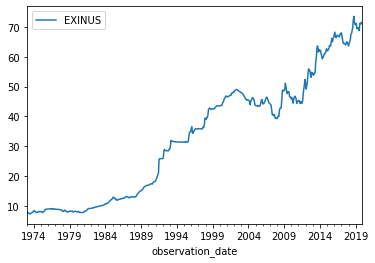

In [3]:
df.plot()
plt.show()

## Show the trend

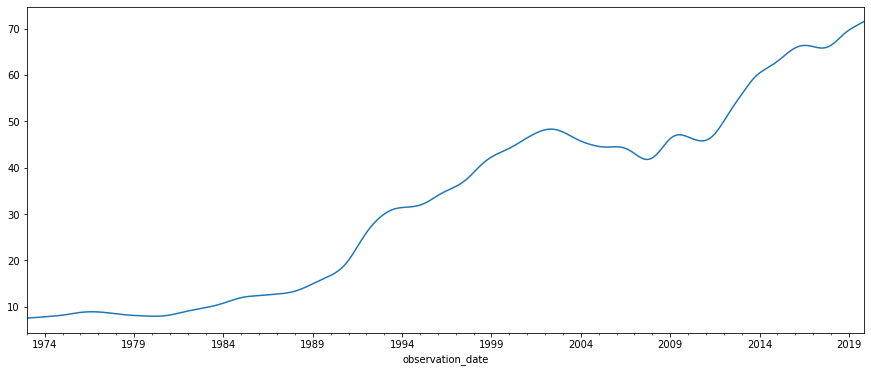

In [4]:
EXINUS_cycle, EXINUS_trend = hpfilter(df.EXINUS, lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x', tight=True)

## Detrending

#### Detrending using pandas differencing

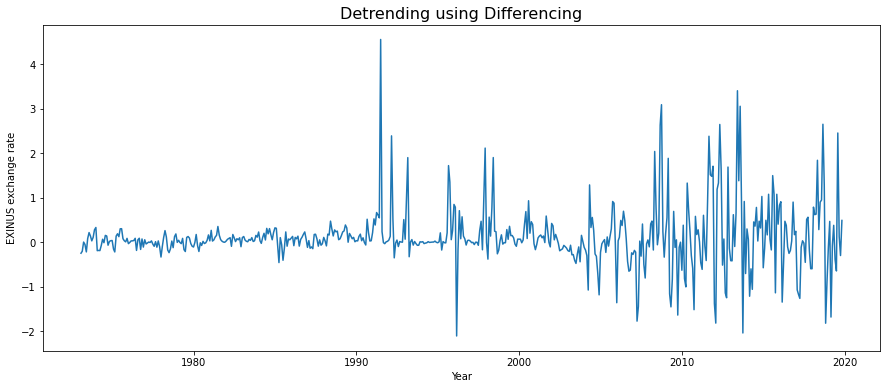

In [5]:
diff = df.EXINUS.diff()

plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

#### Detrending Using a SciPy Signal

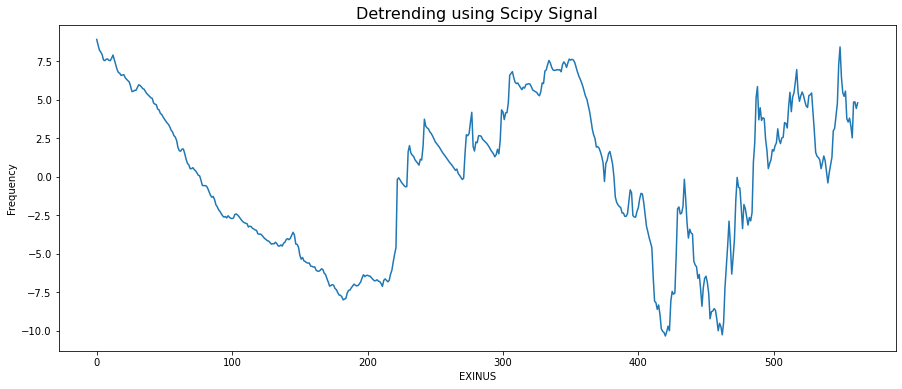

In [6]:
from scipy import signal

detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

#### Detrend Using an HP Filter

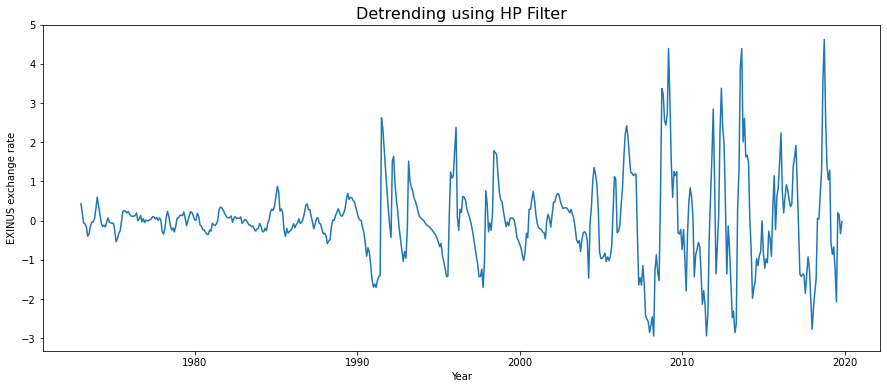

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

EXINUS_cycle, EXINUS_trend = hpfilter(df.EXINUS, lamb=1600)
df['trend'] = EXINUS_trend

detrended = df.EXINUS - df.trend

plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Seasonality

## Detect Seasonality

#### Detect Seasonality using multiple Box Plots

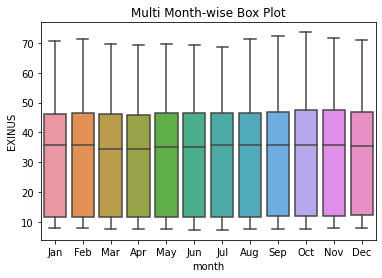

In [8]:
import seaborn as sns
df = pd.read_excel('../data/India_Exchange_Rate_Dataset.xls', parse_dates=True)
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df.year.unique()

sns.boxplot(x='month', y='EXINUS', data=df).set_title('Multi Month-wise Box Plot')
plt.show()

#### Detect Seasonality using Autocorrelation Plot

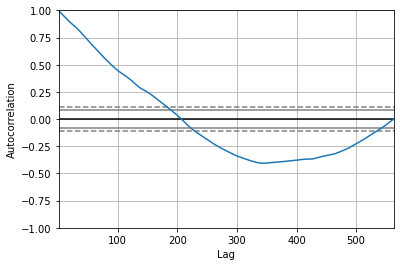

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.EXINUS.tolist())
plt.show()

### Seasonal Decomposition

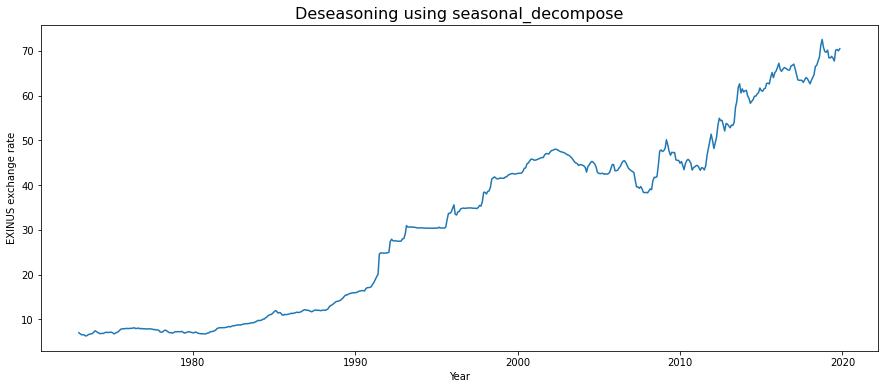

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_excel('../data/India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True)

result_mul = seasonal_decompose(df.EXINUS,
                                model='multiplicative',
                                extrapolate_trend='freq')
deseason = df.EXINUS - result_mul.seasonal

plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## Cycles

### Detecting Cyclical Variations

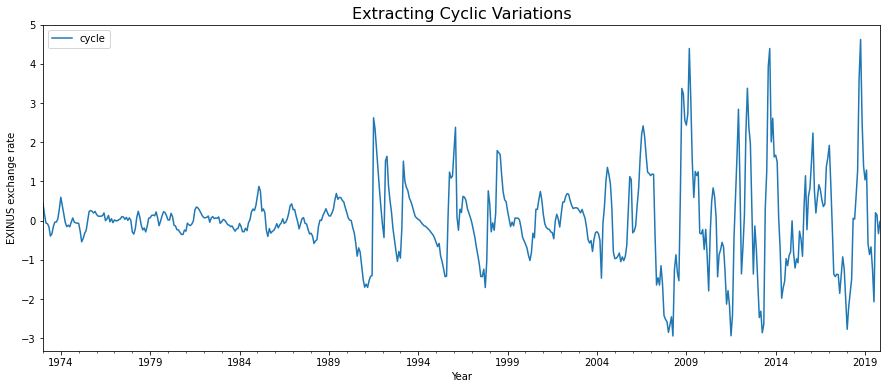

In [15]:
from statsmodels.tsa.filters.hp_filter import hpfilter
%matplotlib inline

EXINUS_cycle, EXINUS_trend = hpfilter(df.EXINUS, lamb=1600)
df['cycle'] = EXINUS_cycle
df['trend'] = EXINUS_trend

df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## Decomposition

### Decomposing a Time Series into its Components

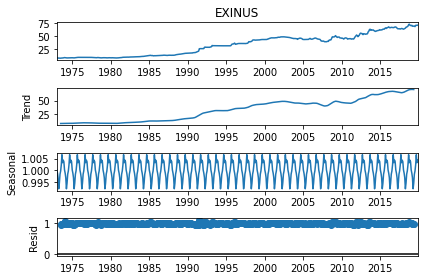

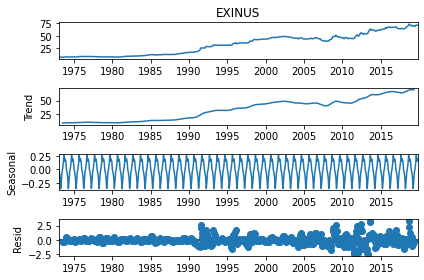

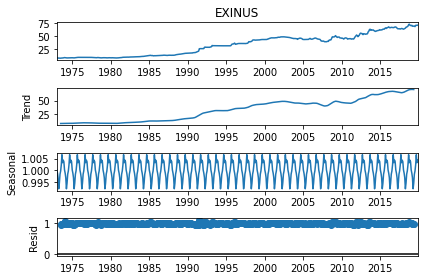

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.EXINUS, model='add')
result.plot()

result = seasonal_decompose(df.EXINUS, model='mul')
result.plot()